## A Taster to the Juxtorpus
<span style="font-size:16px;">

This notebook showcases some usages of the ATAP Juxtorpus tool, which includes two major components: **Corpus** and **Jux**. 
The **Corpus** package enables the user to upload, select and build their texts as a Corpus object. The Corpus can then be explored and sliced flexibly into sub-corpus based on various metadata or text patterns within the contents. Several out-of-box tools and visualisations come with the Corpus object so that the user can quickly explore the Corpus and sub-Corpus in a unified manner, and more functions will be developed for similar purposes.

The **Jux** package, on the other hand, is a simpler tool designed to compare and identify the contrasts between a pair of corpora. Although the comparison sounds like a simple task, when this is conducted on corpora refined with specific conditions and using different metrics of comparison, a lot of insights could be extracted from the analysis.

Besides the two new packages to the ATAP text analytic tool suite, this notebook will also demostrate how to integrate other ATAP tools together with the corpus in order to create a reuseable workflow for your research, these include _Concordance Tool_, _Quotations Tool_, _Semantic Tagger_, _Text Similarity Scorer_ etc.

Interactive Widgets were developed for several common functions to make the operations easier for people without technical backgrounds, and this notebook demonstrate both method if a widget is available for the operation.
</span>
<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>



In [2]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [23]:
import os
while 'juxtorpus' not in os.listdir():
    os.chdir('../')
# if  not 'juxtorpus' in os.listdir():
#     os.chdir('../../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

# imports
import pandas as pd
from pathlib import Path
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from juxtorpus.corpus import Corpus
from juxtorpus.corpus.processors import process
from juxtorpus.corpus.app import App
# from juxtorpus.corpus.topic_model import LDA
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux
from juxtorpus import analyse
from juxtorpus.corpus.corpora import Corpora

import warnings
warnings.filterwarnings('ignore')

from atap_widgets.concordance import ConcordanceTable, ConcordanceWidget, ConcordanceLoader
from atap_widgets.concordance import prepare_text_df
from quotation_tool import QuotationTool

from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
pd.set_option('display.max_colwidth', 255)

# 1. Corpus Building and Exploration

<span  style="font-size:16px;">

The **Corpus** package is the essential platform for text operations and explorations. Users can upload or link their text collections with associated metadata, then compile the selected texts as a *Corpus* object. A *Corpus* object consists of a number of *documents* and the metadata that describe the documents, such as *title*, *publish date*, *author*, *word count* etc.  
A corpus can be built with either codes or an interactive widget within this notebook. When the input data are in the format of a spreadsheet, each row of data will be come one document. The user needs to specify the column for the text contents, and all other columns are compiled as associating metadata. The data type, e.g. *numeric*, *text*, *datetime*, *category*, need to be determined on the corpus building, and this affects how each meta data can be used in the further slicing operations.  
Once a corpus is built, the user is provided some basic out-of-box tools to explore the text contents or metadata, such as generating a word frequency table, plotting a word cloud, create a timeline plot of the documents or certain patterns in the text, or to perform certain analysis on the corpus with either ATAP or external tools, e.g. running *concordance tool*, *quotation tool* or *LDA topic modelling* etc.  
### The following section will demonstrate how to upload your text, build a corpus and explore it's contents.
</span>

## 1.1 Upload your text and build a Corpus with corpus.widget()

<span  style="font-size:16px;">
    
The **Corpora()** creates a corpus container that holds many Corpus objects. Each corpus can be built and named within the builder widget after the text contents are uploaded. Once the column of text is selected, and the data type of each meta data is set, the user can name the corpus and click on the button **Build**. If no name is manually given, a random name will be given to the corpus.
</span>

In [4]:
corpora = Corpora()
corpora.widget()

<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>About the data</b> 

The uploaded data is a processed subset of a [Kaggle twitter dataset on Customer Service](https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter), and in this example we have included tweet messages posted between 10/2017 and 11/2017 about 4 companies (SpotifyCares, ComcastCares, AmericanAir, British_Airways).
</div>

### The Corpus we just built consists tweet conversations between customer cares of four companies and their happy/angry customers. We have named it as **CS** will explore the content a bit later and show you how to view it at different levels and granurities.

In [6]:
corpora.items()

['CS', 'News']

## 1.2 A few basic operations on your corpus
### A summary of your corpus

In [7]:
corpus = corpora['CS']
corpus.summary()

Name                                                                                                 CS
Parent                                                                                                 
Corpus Type                                                                                      Corpus
Number of Documents                                                                              283489
Number of Total Words                                                                           4359630
Size of Vocabulary                                                                               172242
mean Words per Document                                                                              15
min Words per Document                                                                                1
max Words per Document                                                                               62
metas                    author_id, inbound, created_at, in_response_to_tweet_id, company, conversation

### Check the contents of the documents in the corpus

In [8]:
corpus.docs().head(5)
# corpora['CS'].to_dataframe().head(15)

0                               @115887 Hmm. Can you try restarting your device by holding the Sleep/Wake + Volume Down buttons for 10 seconds? Keep us posted /LS
1                                                                                                     @SpotifyCares doesn’t work and i even tried deleting the app
2    @SpotifyCares Premium &amp; when i️ have it on shuffle it turns off when the song is done and just plays in order and the repeat lights up but doesn’t repeat
3                                        @115887 Could you send us a DM with your account's email address? We'll take a look backstage /CH https://t.co/ldFdZRiNAt
4                             @115887 Thanks. Just to be sure, are you Free or Premium? Also, can you give us more info on what happens when you try using it? /CB
Name: document, dtype: object

### Check the contents of certain corpus meta data

In [6]:
companies = corpora['CS'].meta['company'].series.unique().tolist()
print(companies)

['spotifycares', 'british_airways', 'comcastcares', 'americanair']


### Generating a frequency table from the corpus

In [10]:
corpora['CS'].dtm.freq_table().series.sort_values(ascending=False)
#corpora['CS'].dtm.freq_table().series.sort_values(ascending=False).to_csv('./notebooks/demos/taster_workshop/freq_table.csv')

you       155356
the       145671
your       96142
and        93020
for        80506
           ...  
669154         1
669153         1
669152         1
669151         1
인피니트           1
Name: freq, Length: 172242, dtype: int64

## 1.3 Some visualisation from the corpus

### **Wordcloud** 
#### We can easily generate a wordcloud out of the corpus, and exclude certain words if they are blocking the view.

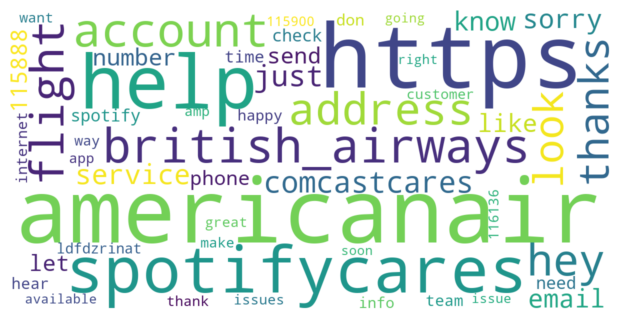

In [13]:
#stop_words = ['https'] + companies
corpora['CS'].viz.wordcloud()

#### Create a subcorpus by randomly sampling the corpus, then display wordcloud out of that sub-corpus

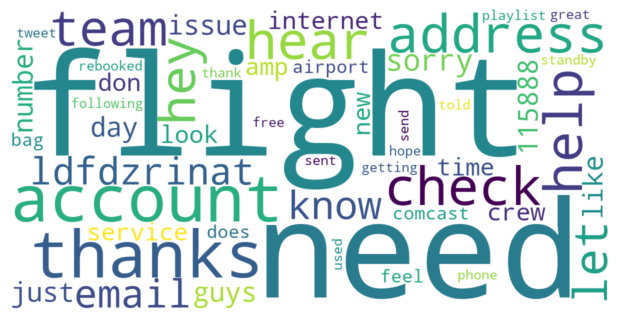

Name Parent Corpus Type Number of Documents  \
  optimal-warthog     CS      Corpus                 100   

 Number of Total Words Size of Vocabulary mean Words per Document  \
                  1469                698                      14   

 min Words per Document max Words per Document  \
                      2                     41   

                                                                           metas  
  author_id, inbound, created_at, in_response_to_tweet_id, company, conversation

In [14]:
stop_words = ['https'] + companies
subcorpus = corpora['CS'].sample(100)
subcorpus.viz.wordcloud(stopwords = stop_words)
subcorpus.summary().T

### **Concordance Tool**

### Use the [ATAP Concordance Tool](https://github.com/Australian-Text-Analytics-Platform/atap_widgets/tree/main) to check some corpus the contents and search for the contexts.
<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>ATAP Concordance Tool</b> 
The ATAP Concordance Tool is a widget developed by the Sydney Informatics Hub under the ATAP project so that the user could interactively search keyword and display the contexts around the keywords within a jupyter notebook. The widget can be used independently if needed.
</div>
<div class="alert alert-block alert-danger" style="font-size:16px;">
<b>Warning</b> 
The ATAP Concordance Tool is not designed to be used on large corpus. Make sure you do not input a large corpus to avoid long loading time. For this twitter dataset, it can process roughly 80 tweets per second, i.e. a corpus with 1000 tweets will take ~13 seconds to load and display.
</div>

In [15]:
import time
st = time.time()
conc = ConcordanceLoader(type='corpus', df_input = subcorpus)
conc.show()
print(time.time() - st, 'seconds')

1.3241329193115234 seconds


### **Timeline**
### With datetime metadata in this corpus, we can plot some timelines to view the historical activities.

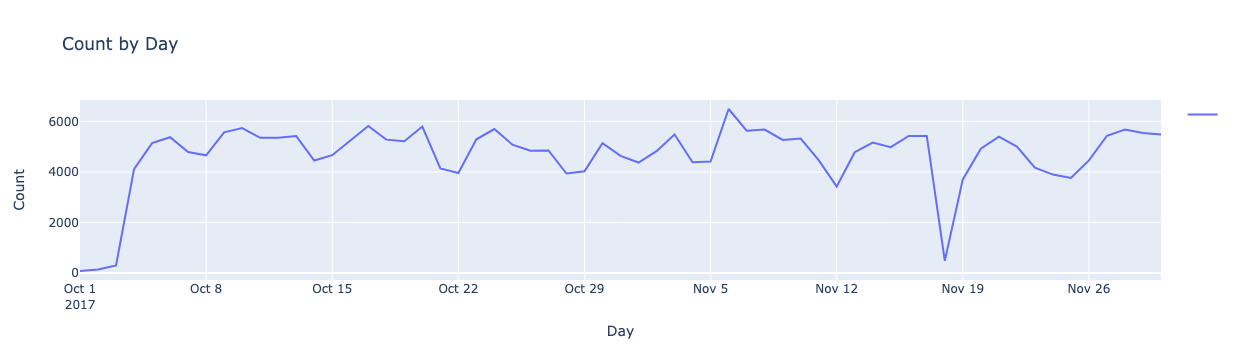

In [16]:
corpora['CS'].viz.timeline('created_at', freq='1D')
# corpora['CS'].viz.timeline('created_at', freq='1D', meta_name='conversation')

## 1.4 Build a corpus with code
<div class="alert alert-block alert-info" style="font-size:16px;">
<b>Using the Code or Widget</b>
    
The Juxtorpus is a python package developed to work without notebook, thus all operations can be done through python functions in code.

On the other hand, some widgets are developed as additional interactive components specifically for work on notebooks, with a purpose to make some common tasks easier for people with less coding skills. The widgets may not cover all the functions available in Juxtorpus, and sometimes it's easier to modify and repeat task in a chunk of code.
</div>

### The following is an example to build a corpus from a pre-exist CSV file

<div class="alert alert-block alert-warning" style="font-size:16px;">
    
In order to build your corpus with codes, you need to know the structure of your data, e.g. file path, file type, headers, data types of all metadata, and some understanding about the [Pandas](https://pandas.pydata.org) Dataframe.
</div>


In [17]:
use_cols = ['text', 'text_name', 'author', 'date', 'source']
dtypes = {'text': str, 
        'text_name': str, 
        'author':str,
        'date': str,
        'source':'category'}

df = pd.read_excel(Path('./notebooks/demos/taster_workshop/news.xlsx'),
                 usecols=use_cols, 
                 dtype=dtypes)
df['date'] = pd.to_datetime(df['date'])
corpus = Corpus.from_dataframe(df, col_doc='text', name='News')

corpora.add(corpus)

[INFO] News already exists. It renamed to News_


In [4]:
# # The Customer Service Corpus can be built with the following code.
# corpora = Corpora()
# use_cols = ['author_id', 'inbound', 'created_at', 'text', 'in_response_to_tweet_id', 'company', 'conversation']
# # dtypes = ['Int64', 'category', 'string', 'string', 'Int64', 'Int64', 'category', 'category']

# df = pd.read_csv(Path('./notebooks/demos/taster_workshop/twcs_sel.csv'),
#                  usecols=use_cols, 
#                  dtype={'author_id': str,
#                         'inbound': 'category',
#                         'created_at': str,
#                         'text':str,
#                         'in_response_tweet_id': 'Int64',
#                         'company': 'category', 
#                         'conversation': 'category'})

# df['created_at'] = pd.to_datetime(df['created_at'])
# # #corpus = process(Corpus.from_dataframe(df, col_doc='text', name='auspol'), nlp=spacy.blank('en'))
# corpus = Corpus.from_dataframe(df, col_doc='text', name='CS')
# corpora.add(corpus)

# 2. Corpus Slicing
<div class="alert alert-block alert-info" style="font-size:16px;">
    
A slicing operation can be done through the corpora.widget().  
When a corpus is selected in the widget, the slicer pane expands and the corpus can be sliced based on the metadata. 
    
The slicing operations vary according to different data types of the used metadata, and the user can add and combine different operations for slicing a corpus.  
Within the widget, the size of new sub-corpus is displayed for the user's information.
</div>

## 2.1 Slicing with the widget

In [8]:
corpora.widget()
# Create "Customer" and "Service" corpus

## 2.2 Slicing with codes
<div class="alert alert-block alert-info" style="font-size:16px;">
    
Depending on the data type of meta data, several functions can be used to slice your corpus. The user can call the slicer functions **corpus.slicer.filter_by_xxx()** with appropriate arguments, e.g.  
Categorical metadata: use _corpus.slicer.filter_by_item()_  
Datetime metadata: use _corpus.slicer.filter_by_datetime()_  
Numeric metadata: use _corpus.slicer.filter_by_range()_  
Text data: use _corpus.slicer.filter_by_regex()_   
And for more general and complex situtation, the user can define the slicing criteria and use _corpus.slicer.filter_by_condition()_ function.  
For more information, refer to the [Juxtorpus documentations]() (_under development_).
</div>

### In the following cell, we create four sub-corpora that consist of _inbound_ messages (from the customers) to each of the four companies, _AmericanAir_, _British_Airway_, _ComCast (telecommunication)_ and _Spotify_).  
### Each of these sub-corpora are added into the corpora, and can be sliced further within the widget.

In [6]:
temp = corpora['CS'].slicer.filter_by_item('inbound', 'True')
# temp = corpora['Customer']
AA_C = temp.slicer.filter_by_item('company', 'americanair')
AA_C.rename('AA_C')
BA_C = temp.slicer.filter_by_item('company', 'british_airways')
BA_C.rename('BA_C')
CC_C = temp.slicer.filter_by_item('company', 'comcastcares')
CC_C.rename('CC_C')
SP_C = temp.slicer.filter_by_item('company', 'spotifycares')
SP_C.rename('SP_C')
corpora.add([AA_C, BA_C, CC_C, SP_C])
corpora.items()

['CS', 'AA_C', 'BA_C', 'CC_C', 'SP_C']

<div class="alert alert-block alert-warning" style="font-size:14px;">
<b>

## What is a sub-corpus
</b>
    
Each sub-corpus has a parent-corpus which indicates from which corpus the current corpus is sliced from, however a sub-corpus is still a corpus covering a sub-set documents of the original corpus, and everything works with a corpus can be done on a sub-corpus. 
A sub-corpus can be explored with the exact same functions and visualisations, e.g. the new _Frequency table_, _Word cloud_, _Timeline_ or _Summary_ will just be generated based on what's in the sub-corpus, so that you can understand how different each sub-corpus is.
</div>

In [45]:
corpora.widget()

### Slice by Regular Expression on your Texts
<span  style="font-size:16px;">
    
The slicing operations above are all based on the metadata, however often content based slicing are required when there aren't enough information to use in the metadata. Advanced slicing will be introduced at the end of this notebook, and the following is an example of slicing a corpus using regular expression and find all tweets that contain the word _"thank"_ from the BA_C corpus.
</span>

<div class="alert alert-block alert-info" style="font-size:12px;">

A regular expression, commonly known as [**regex**](https://www.regular-expressions.info/), is a sequence of characters that forms a search pattern. It is used to match and manipulate text strings based on a defined pattern. Regular expressions are incredibly versatile and allow for complex pattern matching, making them useful for tasks like data validation, searching, and text manipulation. They are supported by many programming languages and tools, offering a powerful toolset for working with textual data.
</div>

In [10]:
corpus = corpora['BA_C'].slicer.filter_by_regex('document', r'thank', ignore_case=True)
corpus.rename('BA_C_pos')
corpora.add(corpus)

## 2.3 Explore and compare the (sub-)corpora

<span  style="font-size:16px;">
    
**Timelines** that plots the same metric on multiple corpus for comparison
    </span>

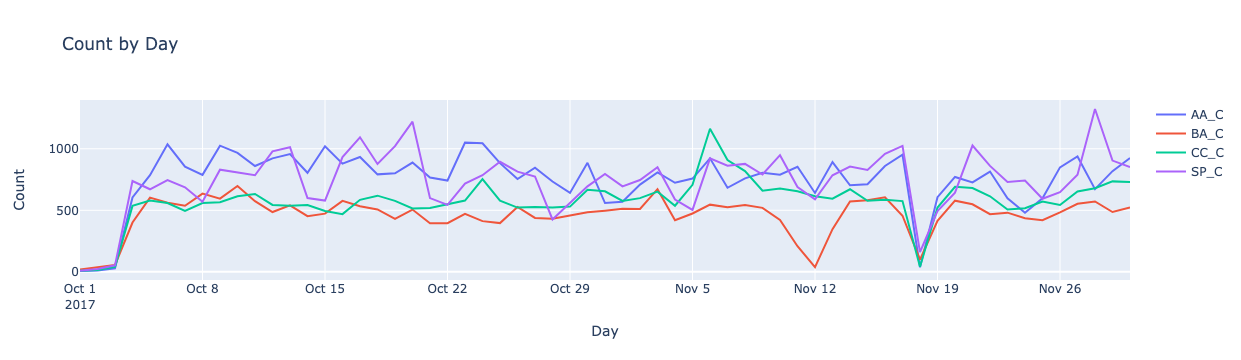

In [25]:
corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D')
# corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D', meta_name='conversation')
# corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1W', meta_name='author_id')

### **WordCloud** and additional options for the wordcloud creation

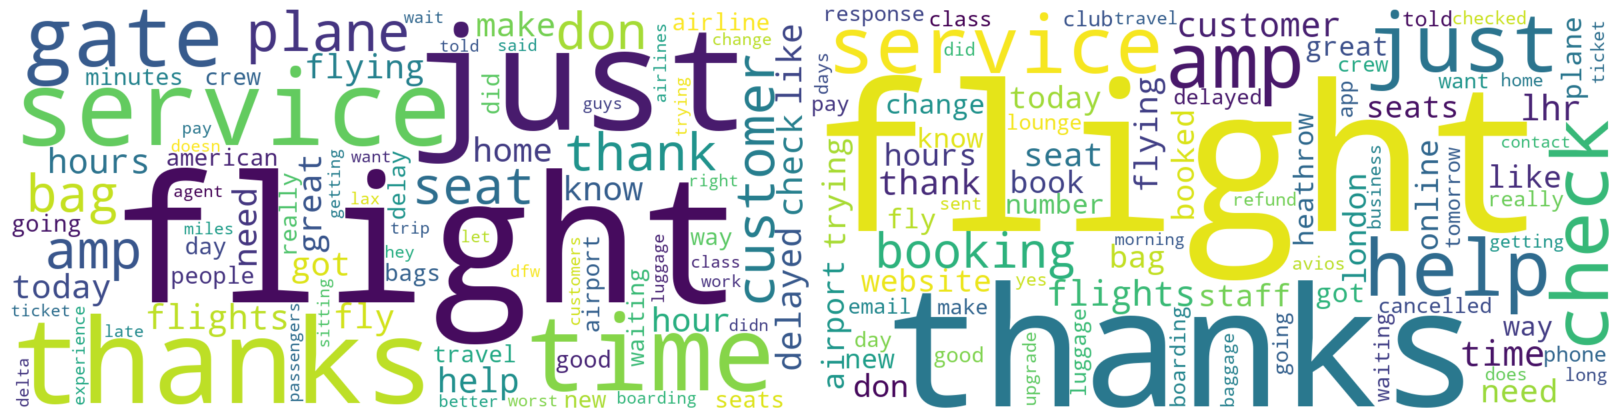

In [26]:
# Wordcloud for multiple corpora 
MAXWORD = 80
TYPE = 'word' # 'word', 'hashtag', 'mention'
METRIC = 'tfidf' # 'tf', 'tfidf'
EXCLUSION = ['https'] + companies

corpora.viz.wordclouds(['AA_C', 'BA_C'], metric=METRIC, max_words=MAXWORD, word_type=TYPE, stopwords=EXCLUSION, lower=True)

### **Interactive Item Timeline**

In [27]:
COL_TIME = 'created_at'
FREQ = '1w'
NAME = 'SP_C'

nlp = spacy.blank('en') #spacy.load('en_core_web_sm')
corpus = process(corpora[NAME], nlp=nlp)

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]

corpus.create_custom_dtm(extract_hashtags)

print('Extract all Hashtags and display their weekly trends\n - Click legend to deselect items\n - Use the search box to display specific hashtag')
item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, use_custom_dtm=True)
item_timeline.widget()

Spacy Corpus:   0%|          | 0/45114 [00:00<?, ?it/s]

Extract all Hashtags and display their weekly trends
 - Click legend to deselect items
 - Use the search box to display specific hashtag


FigureWidget({
    'data': [{'marker': {'color': 'rgba(70,7,0,1.0)'},
              'mode': 'lines+markers+text',
              'name': '#spotify',
              'text': [, , , , , , , , , 267.0],
              'textfont': {'color': 'crimson'},
              'textposition': 'bottom center',
              'type': 'scatter',
              'uid': '3c7b48e6-0962-4254-945b-e850d807facd',
              'x': [2017-10-01 00:00:00, 2017-10-08 00:00:00, 2017-10-15 00:00:00,
                    2017-10-22 00:00:00, 2017-10-29 00:00:00, 2017-11-05 00:00:00,
                    2017-11-12 00:00:00, 2017-11-19 00:00:00, 2017-11-26 00:00:00,
                    2017-12-03 00:00:00],
              'y': array([ 0., 22., 29., 35., 27., 29., 37., 25., 28., 35.])},
             {'marker': {'color': 'rgba(232,238,238,1.0)'},
              'mode': 'lines+markers+text',
              'name': '#reputation',
              'text': [, , , , , , , , , 138.0],
              'textfont': {'color': 'crimson'},
      

# 3 Jux<span style="font-size:18px;">tapose</span> a pair of corpora
<div class="alert alert-block alert-info" style="font-size:14px;">
    
The **Jux** is a python package specially developed to work with the **Corpus** package with a focus on comparing and constrasting to highlight the differences between two corpora on the token/word level.  
The idea of **Jux** is to highlight the _features_ of corpus by eliminating the common words that are used in a similar way in both corpora.  
Several metrics have been implemented for measuring the word usage similarity, including *TF* (term frequency), *TF-IDF* (term frequency - inverse document frequency), and *Loglikelihood* from [Keyword Analysis]().
</div>


## 3.1 Keyword Analysis
<span style="font-size:16px;">
    
*Keyword analysis* in corpus linguistics involves the identification and examination of significant words or terms within a corpus of texts. It aims to identify words that occur more frequently or in a distinctive manner compared to a reference corpus. These keywords provide insights into the thematic or semantic characteristics of the texts under analysis.  
By analysing keywords, researchers can uncover patterns, associations, and underlying themes within a corpus, helping them understand language use, discourse patterns, and linguistic features in different contexts. Keyword analysis is a valuable tool for researchers in various fields, including linguistics, sociolinguistics, discourse analysis, and computational linguistics.
</span>

<div class="alert alert-block alert-warning" style="font-size:14px;">

The keyword analysis method embedded in the Juxtorpus package is implemented according to Prof. Rayson Paul's [webpage](https://ucrel.lancs.ac.uk/llwizard.html) and the following article:  

<span style="font-size:12px;">
Rayson Paul., Berridge D. and Francis B. (2004). Extending the Cochran rule for the comparison of word frequencies between corpora. In Volume II of Purnelle G., Fairon C., Dister A. (eds.) Le poids des mots: Proceedings of the 7th International Conference on Statistical analysis of textual data (JADT 2004), Louvain-la-Neuve, Belgium, March 10-12, 2004, Presses universitaires de Louvain, pp. 926 - 936. ISBN 2-930344-50-4.
    </span>
</div>

<div class="alert alert-block alert-info" style="font-size:14px;">

As part of the ATAP tool suite, a standalone [Keyword Analysis Jupyter Notebook](https://github.com/Australian-Text-Analytics-Platform/keywords-analysis/blob/main/keywords_analysis.ipynb) was developed which can be used by its own.
</div>

In [28]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

CName1 = 'AA_C'
CName2 = 'BA_C'
TopN = 30

FreqTable1 = corpora[CName1].dtm.freq_table().series.rename(CName1)
FreqTable2 = corpora[CName2].dtm.freq_table().series.rename(CName2)
FT_df = pd.concat([FreqTable1, FreqTable2], axis=1, join='outer').fillna(0)

colour = FT_df[CName1] > FT_df[CName2]
print('Blue: Corpus {}; Red: Corpus {}'.format(CName1, CName2))

jux = Jux(corpora[CName1], corpora[CName2])
llv = jux.stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:TopN].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)


Blue: Corpus AA_C; Red: Corpus BA_C


## 3.2 Polarity Wordcloud

<span style="font-size:12px;">
    
    </span>
### As a comparison, what does a wordcloud tell us?

Left: AA_C, Right: BA_C


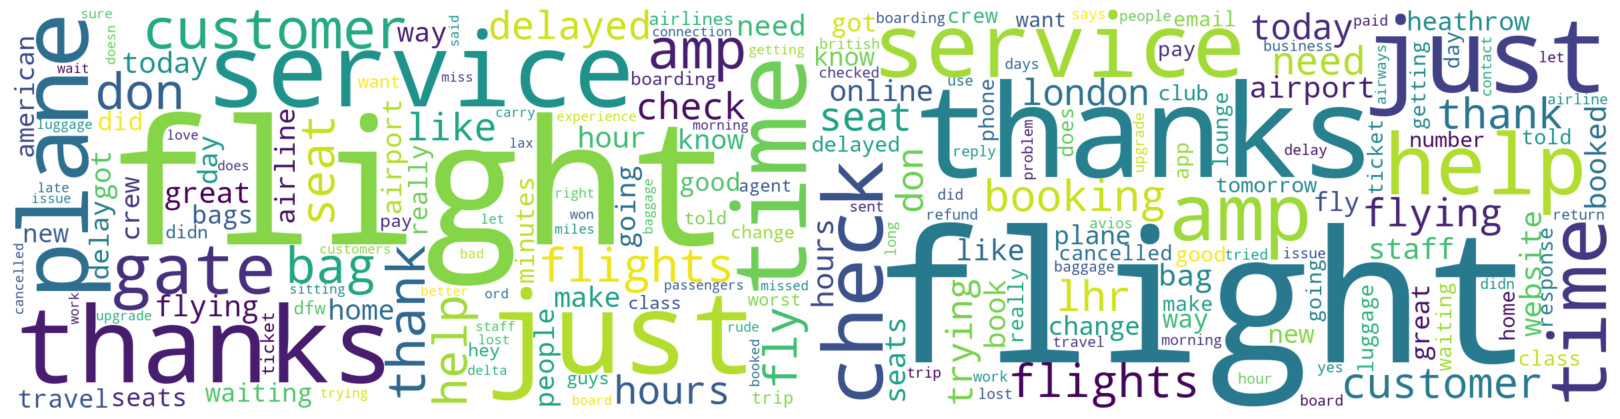

In [29]:
MAXWORD = 100
METRIC = 'tf' # 'tf', 'tfidf', 'log_likelihood'
CName1 = 'AA_C'
CName2 = 'BA_C'

print('Left: {}, Right: {}'.format(CName1, CName2))
corpora.viz.wordclouds([CName1, CName2], metric=METRIC, max_words=MAXWORD, word_type=TYPE, stopwords=EXCLUSION)

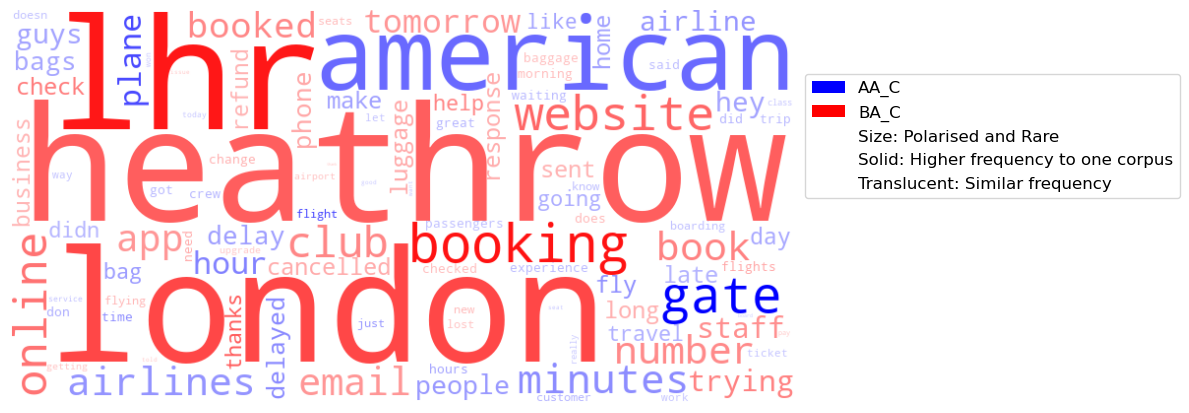

In [30]:
jux_C = Jux(corpora[CName1], corpora[CName2])

jux_C.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)  # change this to 'tfidf' or 'log_likelihood'

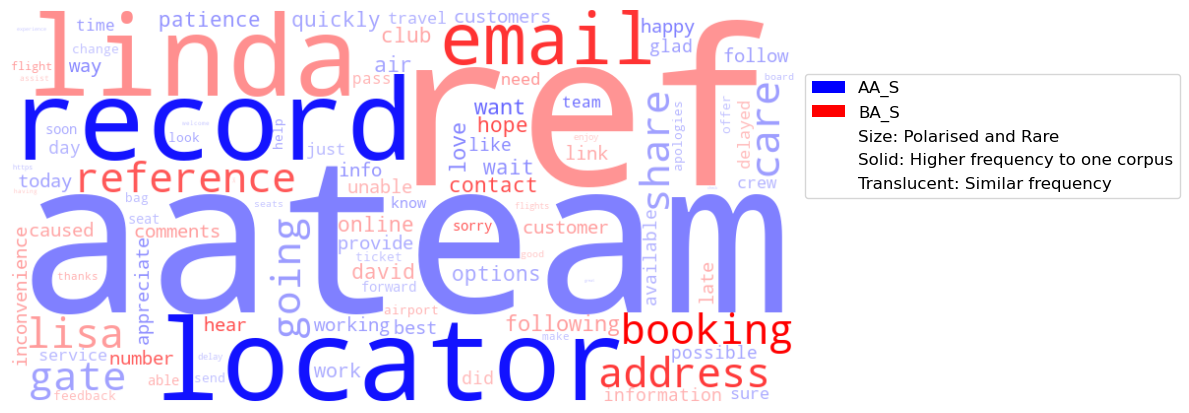

In [31]:
temp = corpora['Service']
AA_S = temp.slicer.filter_by_item('company', 'americanair')
AA_S.rename('AA_S')
BA_S = temp.slicer.filter_by_item('company', 'british_airways')
BA_S.rename('BA_S')

jux_S = Jux(AA_S, BA_S)

jux_S.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)

# 4. Additional Text Analysis with Corpus
<span  style="font-size:16px;">

The power of Juxtorpus lies in comparing and contrasting corpora that are specifically defined and sliced. There are only so many ways to slice the data based on the existing metadata, which could also be done within the Excel spreadsheet. In this section, we will demonstrate how to run some text analysis tools with the corpus, which enables the user to slice the corpus differently with more meaningful ways.
</span>

## 4.1 Sentiment Analysis
<div class="alert alert-block alert-info" style="font-size:16px;">
    
By utilising sentiment analysis, it becomes possible to detect the presence of negative or positive sentiment in textual data. This analysis adds a new "sentiment" metadata to the corpus, which is assigned a value ranging from -1 to 1. This sentiment metadata can then be used for further slicing the corpus base on the identified sentiments.
</div>

<div class="alert alert-block alert-warning" style="font-size:14px;">

Juxtorpus incorporates the use of [spaCy](https://spacy.io/) embedded model known as [TextBlob](https://textblob.readthedocs.io/). TextBlob is a Lexicon-based (Rule-based) sentiment analyzer that utilizes predefined rules and a word-weight dictionary to calculate the polarity of a sentence. It is important to note that, like all algorithm-based models, sentiment analysis cannot achieve 100% precision, and there may be instances where the sentiment score is inaccurate. When using this tool for analysis, please bear this in mind. In the future, Juxtorpus will have the capability to support other models for this task, each performing differently depending on the scenario.
</div>

<span  style="font-size:16px;">
    
The following is an example to demonstrate how to run sentiment analysis on a sample of 2,000 customer tweets out of the Spotify subcorpus, and do a Jux to compare the positive and negative messages.

Spacy Corpus:   0%|          | 0/2000 [00:00<?, ?it/s]

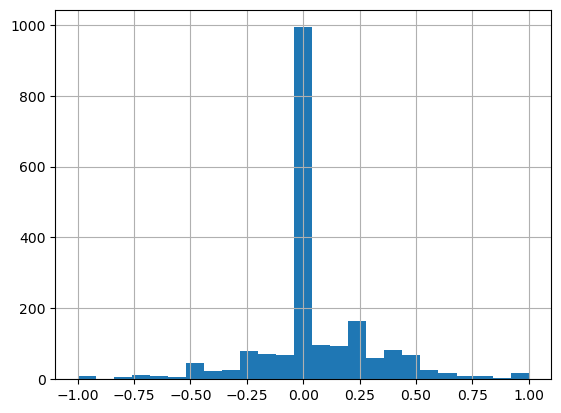

In [38]:
NAME = 'SP_C'

corpus = corpora[NAME].sample(2000)
sentiments = analyse(corpus, method='sentiment', model='textblob', add_results=True)
sentiments.render()

In [39]:
neg = corpus.slicer.filter_by_range('#sentiment', max_=-0.25)
pos = corpus.slicer.filter_by_range('#sentiment', min_=0.25)
neg.rename('neg')
pos.rename('pos')

[INFO] neg already exists. It renamed to neg_
[INFO] pos already exists. It renamed to pos_


SP_C


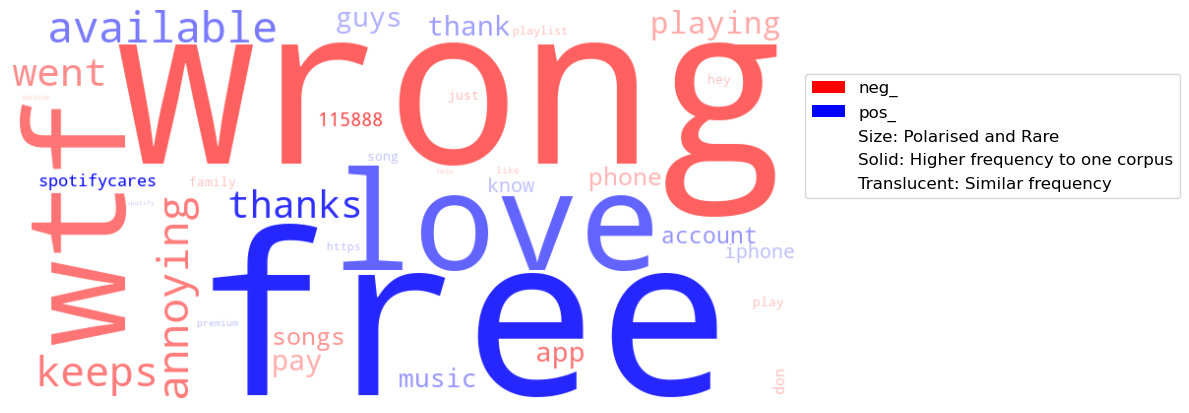

In [40]:
jux = Jux(neg, pos)
print(NAME)
jux.polarity.wordcloud(metric='tf', top=35, colours=('red', 'blue')) 

In [36]:
conc = ConcordanceLoader(type='corpus', df_input = neg)
conc.show()

<span  style="font-size:16px;">

Similarly, the comparison can be done between negative messages from the AmericanAir customers and British Airway customers.    
</span>

In [16]:
aa = corpora['AA_C'].sample(2000)
ba = corpora['BA_C'].sample(2000)
sentiments = analyse(aa, method='sentiment', model='textblob', add_results=True)
sentiments = analyse(ba, method='sentiment', model='textblob', add_results=True)
#sentiments.render()

aa_neg = aa.slicer.filter_by_range('#sentiment', max_=-0.25)
ba_neg = ba.slicer.filter_by_range('#sentiment', max_=-0.25)
aa_neg.rename('aaN')
ba_neg.rename('baN')
jux = Jux(aa_neg, ba_neg)

Spacy Corpus:   0%|          | 0/2000 [00:00<?, ?it/s]

Spacy Corpus:   0%|          | 0/2000 [00:00<?, ?it/s]

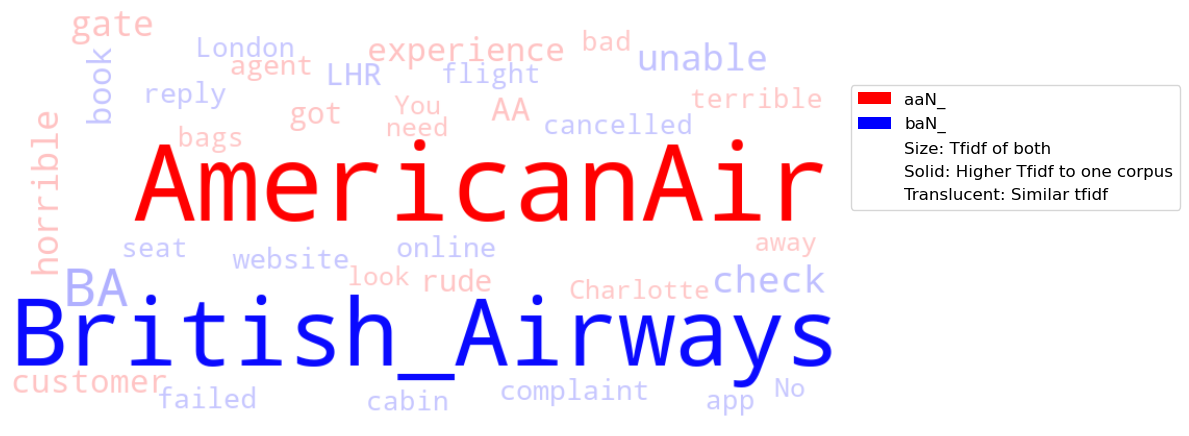

In [44]:
jux.polarity.wordcloud(metric='tfidf', top=35, colours=('red', 'blue'), stopwords = companies + [], lower=False) 

In [ ]:
conc = ConcordanceLoader(type='corpus', df_input = ba_neg)
conc.show()

## 4.2 Quotation Tool

In [50]:
inc_ent = ['ORG','PERSON','GPE','NORP','FAC','LOC']

qt_corpus, qt = analyse(corpora['News'], method='quotation', doc_id='text_name', entities=inc_ent)
corpora.add(qt_corpus)

Loading spaCy language model...
This may take a while...
Finished loading.
Extracting quotes...
This may take a while...


100%|███████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.93it/s]
[INFO] News_quotation already exists. It renamed to News_quotation_


In [96]:
df = qt.get_quotes(inc_ent)

Extracting quotes...
This may take a while...


100%|███████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 14.17it/s]


In [97]:
orpusf.to_excel('qt.xlsx', index=False)

In [100]:
qt_corpus.meta['verb'].series

0       said
1      wrote
2       said
3       told
4       said
       ...  
110     said
111         
112         
113         
114         
Name: verb, Length: 115, dtype: object

In [101]:
from collections import Counter
Counter(qt_corpus.meta['verb'].series).most_common()

[('said', 47),
 ('', 20),
 ('told', 13),
 ('says', 9),
 ('ensure', 3),
 ('saying', 3),
 ('warned', 2),
 ('estimates', 2),
 ('wrote', 1),
 ('admitted', 1),
 ('suspect', 1),
 ('suggested', 1),
 ('insisted', 1),
 ('know', 1),
 ('indicated', 1),
 ('suggest', 1),
 ('minimise', 1),
 ('consider', 1),
 ('notes', 1),
 ('confirmed', 1),
 ('released', 1),
 ('states', 1),
 ('according to', 1),
 ('claims', 1)]

In [49]:
qt.analyse_quotes(inc_ent)

In [51]:
corpora.widget()

## 4.3 Topic Modelling

In [53]:
NUM_TOPICS = 8
MODE = 'tf'
NAME = 'News'

lda = analyse(corpora[NAME], method='topic_model', num_topics=NUM_TOPICS, mode=MODE, add_results=True)
lda.widget()

/Users/mily/miniconda3/envs/jux/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.196676 -0.042342       1        1  32.320093
0     -0.139944 -0.102877       2        1  20.391059
7     -0.051622  0.205935       3        1  13.145027
6     -0.064422 -0.034738       4        1   7.467483
3     -0.068831 -0.030907       5        1   6.996628
1      0.119987 -0.003920       6        1   6.863590
5     -0.036456 -0.003352       7        1   6.849485
2      0.044612  0.012200       8        1   5.966634, topic_info=          Term       Freq      Total Category  logprob  loglift
860   morrison  40.000000  40.000000  Default  30.0000  30.0000
843   minister  36.000000  36.000000  Default  29.0000  29.0000
571        gas  17.000000  17.000000  Default  28.0000  28.0000
452     energy  19.000000  19.000000  Default  27.0000  27.0000
575    general  10.000000  10.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
685   industry   1.111130   6.924866   Topic8  -5.2066   0.9892
1206     scott   1.111130   7.657373   Topic8  -5.2066   0.8887
881        new   1.111120  12.881775   Topic8  -5.2066   0.3685
521    federal   1.111120   9.809530   Topic8  -5.2066   0.6410
1374      time   1.111119   7.383459   Topic8  -5.2066   0.9251

[444 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.343817    000
0         4  0.171909    000
0         5  0.171909    000
0         7  0.343817    000
5         4  0.820276    14m
...     ...       ...    ...
1482      4  0.099877   year
1482      5  0.199754   year
1482      7  0.199754   year
1483      4  0.428563  years
1483      7  0.428563  years

[606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 8, 7, 4, 2, 6, 3])

In [56]:
# The topics can be used for further slicing the corpus.
corpora.widget()

## 4.4 Advanced Matcher Based Content Slicing
<span  style="font-size:16px;">

Besides the slicer widget and slicing functions, for more complicated scenario, the user might want to define specific customised rules to slice for subcorpus based on the content. This can be implemented with the **Matcher** based slicer, and the following is an example to slice all quotations that includes a location (GPE or LOC).
</span>

In [17]:
nlp = spacy.load('en_core_web_sm')
temp = process(aa, nlp=nlp)
temp.summary()

Spacy Corpus:   0%|          | 0/2000 [00:00<?, ?it/s]

[INFO] deft-cow[spacy] already exists. It renamed to deft-cow[spacy]_


Name                                                                                                                       deft-cow[spacy]_
Parent                                                                                                                                 AA_C
Corpus Type                                                                                                                     SpacyCorpus
Number of Documents                                                                                                                    2000
Number of Total Words                                                                                                                 31170
Size of Vocabulary                                                                                                                     5356
mean Words per Document                                                                                                                  15
min Words per Document                                                                                                                    1
max Words per Document                                                                                                                   45
metas                    author_id, inbound, created_at, in_response_to_tweet_id, company, conversation, #sentiment, .tensor, .sents, .ents

In [25]:
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')

ner_matcher = Matcher(temp.nlp.vocab)
pattern = [{'ENT_TYPE': {'IN': ['GPE', 'LOC']}}]
ner_matcher.add('GPE_LOC', [pattern])
    
aa_loc = temp.slicer.filter_by_matcher(ner_matcher, min_=1)

aa_loc.summary().T

Name            Parent  Corpus Type Number of Documents  \
  married-marmoset  deft-cow[spacy]_  SpacyCorpus                 223   

 Number of Total Words Size of Vocabulary mean Words per Document  \
                  3841               1439                      17   

 min Words per Document max Words per Document  \
                      2                     43   

                                                                                                                         metas  
  author_id, inbound, created_at, in_response_to_tweet_id, company, conversation, #sentiment, .tensor, .sents, .ents, _matched

In [26]:
ConcordanceLoader(type='corpus', df_input=aa_loc).show()

In [24]:
Counter(aa_loc.meta['_matched'].series).most_common()

[('Dallas', 13),
 ('@AmericanAir', 6),
 ('Miami', 6),
 ('Delta', 5),
 ('DM', 5),
 ('Chicago', 5),
 ('@Delta', 5),
 ('Pittsburgh', 4),
 ('Southwest', 4),
 ('Denver', 4),
 ('LA', 4),
 ('Charlotte', 4),
 ('Hong, Kong', 3),
 ('Alaska', 3),
 ('London', 3),
 ('Boston', 3),
 ('Atlanta', 2),
 ('Los, Angeles', 2),
 ('Phoenix', 2),
 ('US', 2),
 ('DC', 2),
 ('U.S.', 2),
 ('Tampa', 2),
 ('Vegas', 2),
 ('Jamaica', 2),
 ('kinda', 2),
 ('Newark', 2),
 ('Hollywood', 2),
 ('Caracas', 1),
 ('UK, Jamaica, Miami', 1),
 ('@117118', 1),
 ('@VirginAmerica', 1),
 ('France', 1),
 ('Orlando, Florida', 1),
 ('AATeam', 1),
 ('Vancouver', 1),
 ('Canada, US', 1),
 ('Phoenix, @AmericanAir, Ireland', 1),
 ('Platinum', 1),
 ('Asheville, Boston', 1),
 ('Chicago, San, Diego', 1),
 ('America', 1),
 ('Lake, Michigan', 1),
 ('Seattle', 1),
 ('Ohio', 1),
 ('Philadelphia, Chicago', 1),
 ('US, Afghanistan', 1),
 ('Tulsa', 1),
 ('america', 1),
 ('Iowa', 1),
 ('dallas', 1),
 ('Puerto, Rico', 1),
 ('Rome, Rome', 1),
 ('Cincinnat

### Match by linguistic patterns, for instance, a coprus of tweets that contain Compound Nouns.

In [34]:
COMPOUND_NOUNS = Matcher(temp.nlp.vocab)
#NOUN = {'POS': 'NOUN'}
COMPOUND_NOUNS.add('cn', patterns = [
    [{'POS': 'NOUN', "OP": "{2,}"}]
])

cn_corpus = temp.slicer.filter_by_matcher(COMPOUND_NOUNS)
pd.concat([cn_corpus.meta['_matched'].series, cn_corpus.docs().apply(lambda d: d.text)], axis=1)

0  \
474                                volando con   
527                                   size dog   
530     airplane #cabins, bulkhead row, lb dog   
852                           flight attendant   
1473                          dozen passengers   
...                                        ...   
281423                        customer service   
281434                            travel plans   
282342              soy creamer, vegan creamer   
282499            airline I️, customer service   
282580                          miles upgrades   

                                                                                                                                                                                                                                                      document  
474                 @AmericanAir En todos los años que tengo volando con #AA nunca había tenido una experiencia como la de ayer 24 vuelo 914 Caracas-Miami. La peor tripulación, desagradable, descortés y con poca vocación de servicio. #NOCALIDAD #servicio  
527                                       @AmericanAir You’re missing my point. Numerous people tripped over the dog, not to mention anyone who might have been allergic. When did you change your policy to allow any size dog into cabins for any/no reason?  
530                        @AmericanAir I love dogs but they don’t belong in #airplane #cabins. It was bad enough when anyone could say they had a #therapypet. I can’t keep my small bag in the #bulkhead row but the woman next to me can have her 40lb dog?  
852                                                                                                    @AmericanAir When my daughter couldn't make up her mind on what to drink, the flight attendant rolled her eyes at her and proceeded to say something...  
1473                                                                                                                    1/ Why @AmericanAir am I️ loyal to you? Your gate agent greg on ORD-SFO flight wouldn’t let over a dozen passengers take bags designed  
...                                                                                                                                                                                                                                                        ...  
281423                                                                                                                                                                                         @AmericanAir Zvbetr just spent 15 minutes with customer service  
281434                                                                                                                                                                @AmericanAir when would we find out if we need to change our travel plans for Christmas?  
282342                                                                                       Love that @AmericanAir has soy creamer in the Admirals Club, but it should be in-flight, too! Can you please add #vegan creamer to EVERY American Air experience?  
282499  @AmericanAir you guys are probably the most unreasonable airline I️ have ever dealt with so @SouthwestAir all the way from here on out!!!! PSA do not buy an American Airlines ticket if you are looking for good customer service and flexibility!!!!  
282580                                     @286923 @820556 @AmericanAir @114180 @Delta I feel like I would have more opportunities to get in first by getting auto added on every flight rather then trying to strategically use my 500 miles upgrades with AA  

[837 rows x 2 columns]

In [37]:
VERB_ADVERB = Matcher(temp.nlp.vocab)
VERB_ADVERB.add('va', patterns = [[{'POS': 'VERB'}, {'POS': 'ADV'}]])
vad_corpus = temp.slicer.filter_by_matcher(VERB_ADVERB)
pd.concat([vad_corpus.meta['_matched'].series, vad_corpus.docs().apply(lambda d: d.text)], axis=1)

0  \
4539                      said so   
4556                  flying home   
5323                   goes wrong   
6338                    take long   
6654                     have no1   
...                           ...   
274679  get home, waiting forever   
277652                  ’s pretty   
281041   waived however, doing so   
281367             stressed right   
283095                called back   

                                                                                                                                                                                                                                                              document  
4539                                                                                                                                           @AmericanAir Chit chatting for like a good 10 minutes. They could have boarded the bags if the previous worker said so.  
4556                                                                                                                                          If @AmericanAir can find a way to let me watch @117118 game 7 while flying home tonight, you will be my airline for life  
5323                                                                                                          @AmericanAir We are rebooked for tomorrow (as long as nothing goes wrong there, too) but had to spend $350+ for hotel + waste 1 day of our all inclusive  
6338                                                                                                                                                                 @AmericanAir @132229 Wow. That didn't take long - they know you're the man Willson! Good morning!  
6654                                                                                                           1st, @AmericanAir cant get their logs straight for my flight; now we have no1 to push the plane to move it???#EpicFail may miss connecting flight. Wtf.  
...                                                                                                                                                                                                                                                                ...  
274679       Been waiting for almost an hour for @AmericanAir to assign my seat along with more passangers who want to get home to San Juan, Puerto Rico and the plane is boarding in less than 20 minutes. And we still don’t have seats. We’ve been waiting forever.  
277652                                                                                                                                                                                           @AmericanAir That’s pretty obvious... I was just carrying on though 😩  
281041  Very annoyed with @AmericanAir right now! I had to go through them to rebook an Expedia flight to get a fee waived however, the representative failed to tell me I'd have to pay $50 extra for you guys doing so! Not okay and very rude to be told "well a...  
281367                                                                                                                                                                           @AmericanAir stressed right now boy. My flight better not be affected by this either😫  
283095  @AmericanAir No I was told your Special Needs dept was going 2 contact me and they didn't. I called back again tonight &amp; was given a hard time. Now there are no accommodations for my disability on part of my trip. I just want a company to follow t...  

[233 rows x 2 columns]

### What are the big conversations in this customer service data other than complaining?

In [40]:
Counter(corpora['CS'].meta['conversation'].series).most_common()

[('2572581', 203),
 ('56184', 179),
 ('189825', 126),
 ('362600', 123),
 ('2102913', 98)]

In [44]:
long_conv = corpora['CS'].slicer.filter_by_item('conversation', '2572581')
long_conv.to_dataframe().sort_values(by='created_at', ascending=True).head(20)

document  \
242715  The fact that Trump has lifted President Obama's ban on elephant trophies being imported into the country is a devastating blow to the survival of these beautiful animals. It's savage and pointless. It breaks my heart. https://t.co/iclfxN6TXr   
242642                                       @451873 #Airlines need to hold firm on not shipping #trophies to the U.S. Let's make sure @264816 @AmericanAir @British_Airways @Delta @322568 @120565 stay committed to NOT changing their current policies.   
242513                                                                                                                                    @329789 Since 2015, American has banned the transport of animal trophies. We have no plans to change our policy.   
242518                                                                                                                                                                                                        @AmericanAir @329789 Well done, @AmericanAir   
242517                                                                                                                                                                                                        @AmericanAir @329789 Im so glad to hear that   
242516                                                                                                                                                          @AmericanAir @329789 Well done others need to do the same. Only way to stop this nonsense.   
242643                                                                                                                                                                          @729436 @AmericanAir @329789 There's thousands of avenues to bring them in   
242522                                                                                                                                                             @AmericanAir @329789 Very glad to hear that how about other #Airlines #UnitedAirlines ?   
242644                                                                                                                                                                     @729437 @729436 @AmericanAir At least it keeps some of the avenues unavailable.   
242647                                                           @729444 @AmericanAir .@AmericanAir is very responsive to tweets. Don't know if we'll hear from the other airlines. Can just hope they will continue their bans. What do you say @116450 ?   
242521                                                                                                                           @AmericanAir @329789 Excellent, I hope all the world's airlines and shipping companies ban too. Unite against the madness   
242520                                                                                                                                                              @AmericanAir @329789 👏👏👏 well done American Airlines please may all others follow suit   
242519                                                                                                                                                                                    @AmericanAir @329789 Thankyou @AmericanAir. You’re the best 👏👏👏😊   
242553                                                                                                                                         @AmericanAir @329789 Thank you so much. Will use you in my next trip stateside-appalling decision by trump.   
242525                                                                                                                                                                                    @AmericanAir @729448 @329789 thank you! I will fly your airline!   
242524                                                                                                                                                                            

# Keyword Analysis based on Log Likelihood




# Questions and feedbacks 

#### Please take a couple of minutes to fill our feedback form following the link below.  
#### Let us know how we go with this webinar and what you would like to see with future ATAP tools.
<span  style="font-size:16px;">
    
### [http://bit.ly/3BSj1wC](http://bit.ly/3BSj1wC) or scan the following QR code.
</span>

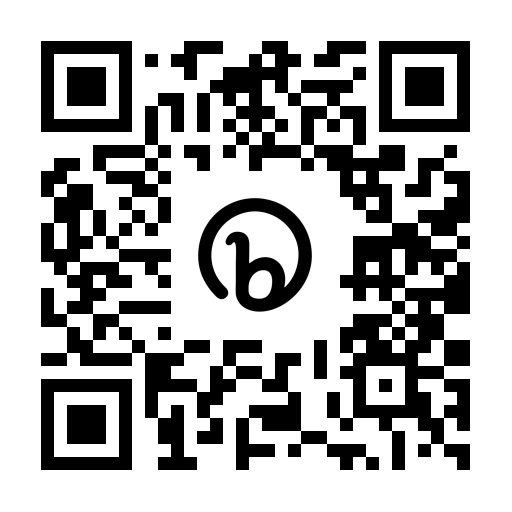

<span  style="font-size:16px;">

We will run a full workshop in semester 2 and the Juxtorpus tool shall be officially released to the public before then.  
If you would like to be an early adoptor and help us to test the tool and to provide feedbacks on bugs and improvements, please express your interest either in the feedback form, or send an email to me at [chao.sun@sydney.edu.au]().

If the ATAP tools have been useful for your research project, we are keen to know about it.  
Please cite our notebook/software and acknowledge the Sydney Informatics Hub and ATAP project when you generate a reserach outcome from using our tools.
</span>
